<a href="https://colab.research.google.com/github/VictoriaOAbel/Analyses/blob/main/Udemy_Build_a_Portfolio_of_5_Data_Analysis_Projects_with_Python%2C_Seaborn%2CPandas%2CPlotly%2C_numpy_etc_%26_get_a_job_of_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Uber New York Data Analysis**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
os.listdir("/content/Uber")

['uber-raw-data-janjune-15_sample.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-may14.csv',
 'other-Diplo_B01196.csv',
 'other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-jul14.csv',
 'other-Highclass_B01717.csv',
 'other-Firstclass_B01536.csv',
 'uber-raw-data-aug14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-American_B01362.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-sep14.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jun14.csv']

In [5]:
uber_15 = pd.read_csv(r"/content/Uber/uber-raw-data-janjune-15_sample.csv")
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [6]:
uber_15.shape

(100000, 4)

In [7]:
#Data Cleaning

In [8]:
type(uber_15)

pandas.core.frame.DataFrame

In [9]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [10]:
uber_15.duplicated().sum()

54

In [11]:
uber_15.drop_duplicates(inplace=True)

In [12]:
uber_15.duplicated().sum()

0

In [13]:
uber_15.shape

(99946, 4)

In [14]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [15]:
uber_15.isnull()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [16]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [17]:
uber_15['Pickup_date']

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
99995    2015-04-13 16:12:00
99996    2015-03-06 21:32:00
99997    2015-03-19 19:56:00
99998    2015-05-02 16:02:00
99999    2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: object

In [19]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [20]:
type(uber_15['Pickup_date'][0])

str

In [18]:
uber_15['Affiliated_base_num']

0        B02764
1        B02682
2        B02617
3        B02764
4        B00111
          ...  
99995    B02764
99996    B02764
99997    B02598
99998    B02682
99999    B02764
Name: Affiliated_base_num, Length: 99946, dtype: object

In [22]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [23]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [24]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [25]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [27]:
#Which month has the maximum Uber pickups in New York City

In [28]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [32]:
#Extract month
uber_15['Pickup_date'].dt.month

0        5
1        1
2        3
3        4
4        3
        ..
99995    4
99996    3
99997    3
99998    5
99999    6
Name: Pickup_date, Length: 99946, dtype: int32

In [33]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [34]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

In [36]:
uber_15['month'].value_counts()

month
June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: count, dtype: int64

<Axes: xlabel='month'>

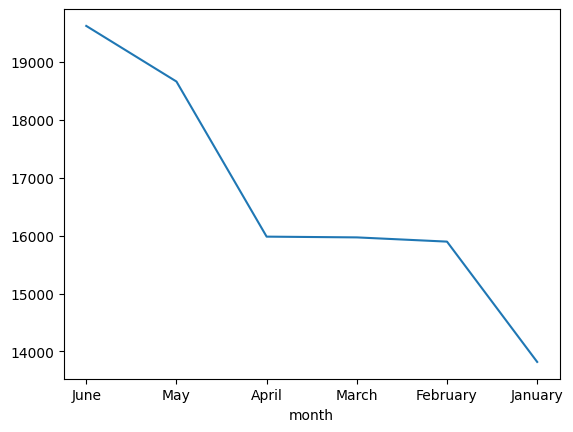

In [37]:
uber_15['month'].value_counts().plot()

<Axes: xlabel='month'>

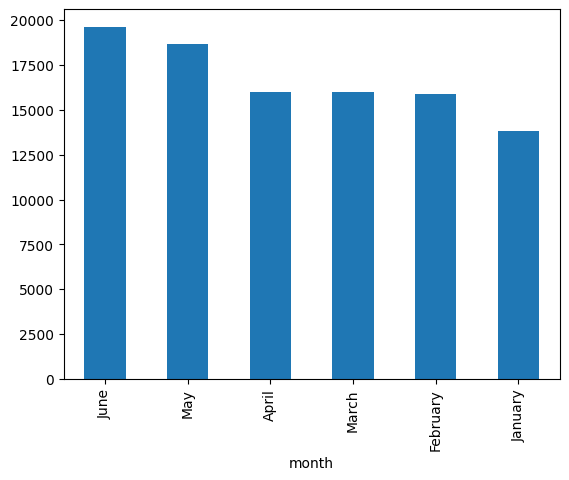

In [38]:
uber_15['month'].value_counts().plot(kind='bar')

In [39]:
uber_15['Pickup_date'].dt.day_name()

0         Saturday
1          Tuesday
2         Thursday
3           Friday
4           Monday
           ...    
99995       Monday
99996       Friday
99997     Thursday
99998     Saturday
99999    Wednesday
Name: Pickup_date, Length: 99946, dtype: object

In [40]:
uber_15['Pickup_date'].dt.day

0         2
1        20
2        19
3        10
4        23
         ..
99995    13
99996     6
99997    19
99998     2
99999    24
Name: Pickup_date, Length: 99946, dtype: int32

In [41]:
uber_15['Pickup_date'].dt.hour

0        21
1        19
2        20
3        17
4         7
         ..
99995    16
99996    21
99997    19
99998    16
99999    16
Name: Pickup_date, Length: 99946, dtype: int32

In [42]:
uber_15['Pickup_date'].dt.minute

0        43
1        52
2        26
3        38
4         3
         ..
99995    12
99996    32
99997    56
99998     2
99999     4
Name: Pickup_date, Length: 99946, dtype: int32

In [43]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [44]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [45]:
pd.crosstab(index=uber_15['month'], columns=uber_15['weekday'])

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [46]:
pivot = pd.crosstab(index=uber_15['month'], columns=uber_15['weekday'])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

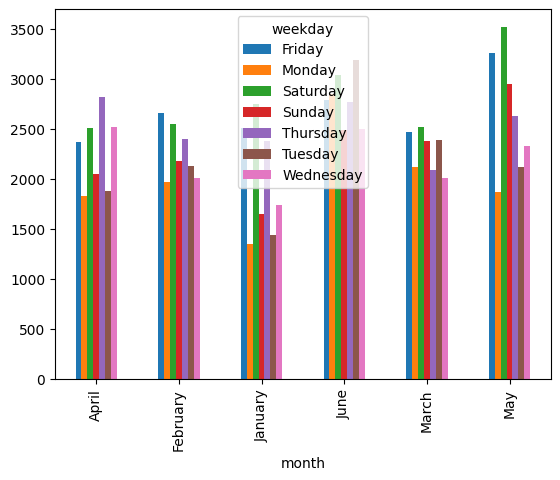

In [47]:
pivot.plot(kind='bar')

<Axes: xlabel='month'>

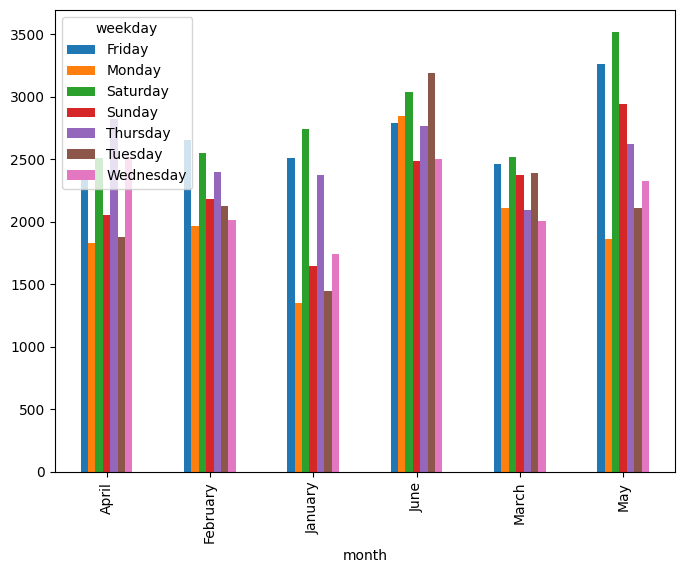

In [48]:
pivot.plot(kind='bar', figsize=(8,6))